# start by importing your librarys


In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot as plt
from numpy import expand_dims
import matplotlib.gridspec as gridspec
import numpy as np

import warnings
warnings.filterwarnings('ignore')

C:\Users\chip\AppData\Local\Temp\ipykernel_32828\2314769849.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#### load vgg16
*and show the layers*

In [3]:
#Load the model
model = VGG16()

# Summary of the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
# retrieve weights from the second hidden layer
filters , bias = model.layers[1].get_weights()

### normalise
*normalise the filters values so they are between 0 and 1*

In [12]:
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# filters

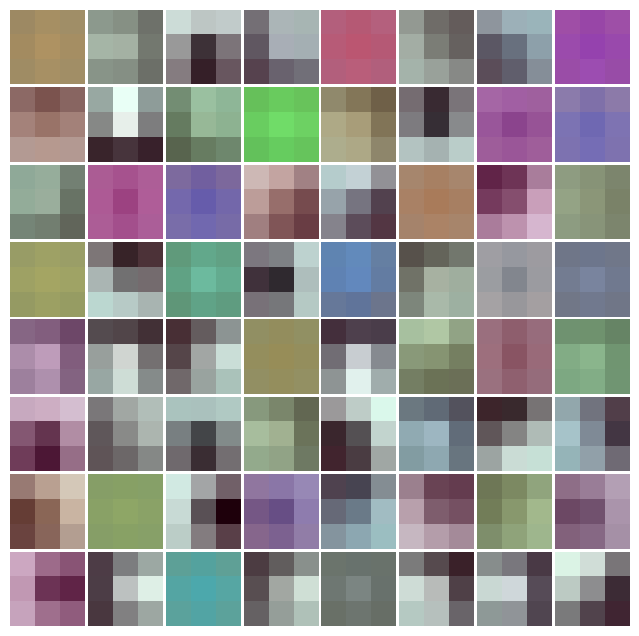

In [13]:
n_filters = 64
ix=1
fig = plt.figure(figsize=(8,8))
gs1 = gridspec.GridSpec(8, 8)
gs1.update(wspace=0.04, hspace=0.04)

for i in range(n_filters):
    # get the filters
    f = filters[:,:,:,i]
    imOut = np.dstack((f[:,:,0],f[:,:,1],f[:,:,2]))
    ax = plt.subplot(gs1[i-1])
    plt.axis(False)
    ax.set_aspect("equal")
    ax.imshow(imOut)
        
#plot the filters 
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()

# feature map

### load image
- load_img from path, set size
- turn to array
- expand dimentions on axis 0 such that is matches the vgg16 model size (none, 224, 224, 3)

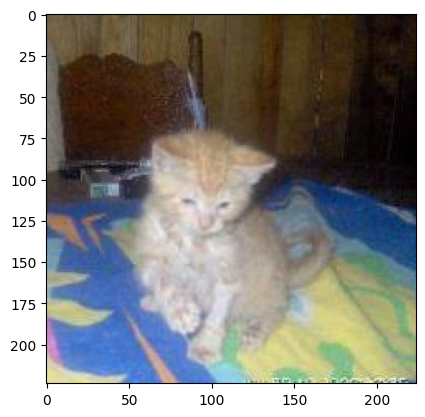

In [14]:
image = load_img("./cat.png" , target_size=(224,224))

# convert the image to an array
image = img_to_array(image)
image = expand_dims(image, axis=0)
plt.imshow(image[0]/255)
# expand dimensions so that it represents a single 'sample'
# image = expand_dims(image, axis=0)
# plt.imshow(image[0])


### preproccesssing
*by preprocessing our model it makes it work idk dont remove this line its important. has something to do with scaling*

In [15]:
image = preprocess_input(image)

### all layers now


In [16]:
blocks = [2, 5 , 9 , 13 , 17]
modelAllOut = Model(inputs=model.inputs, outputs=[model.layers[i].output for i in blocks]) # blocks is just the indexes of the last Convo in the bloack

1/1 [==============================] - 0s 358ms/step


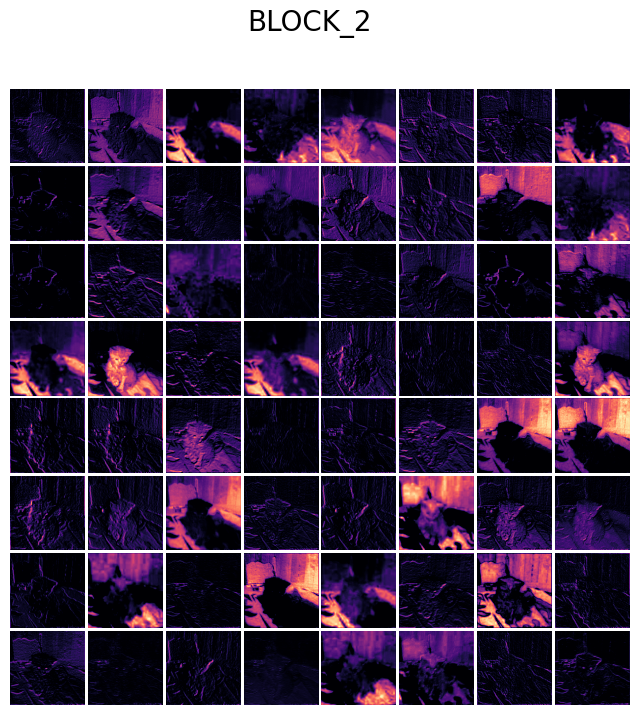

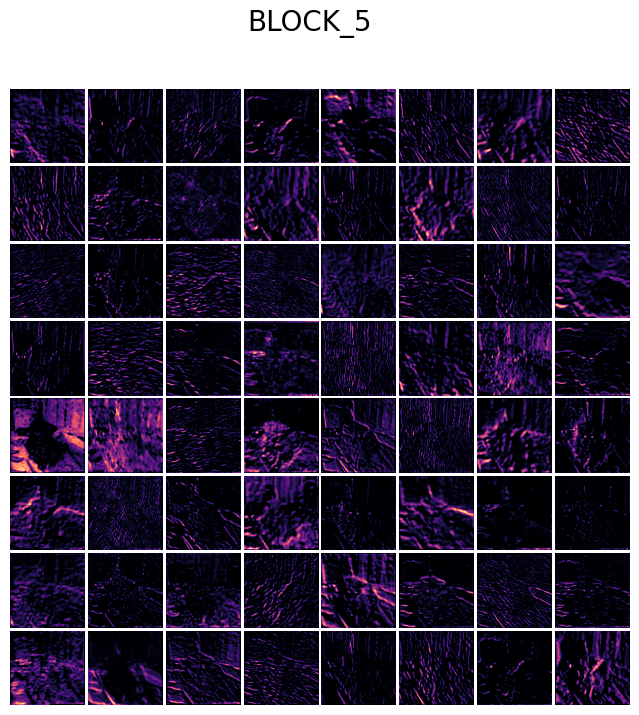

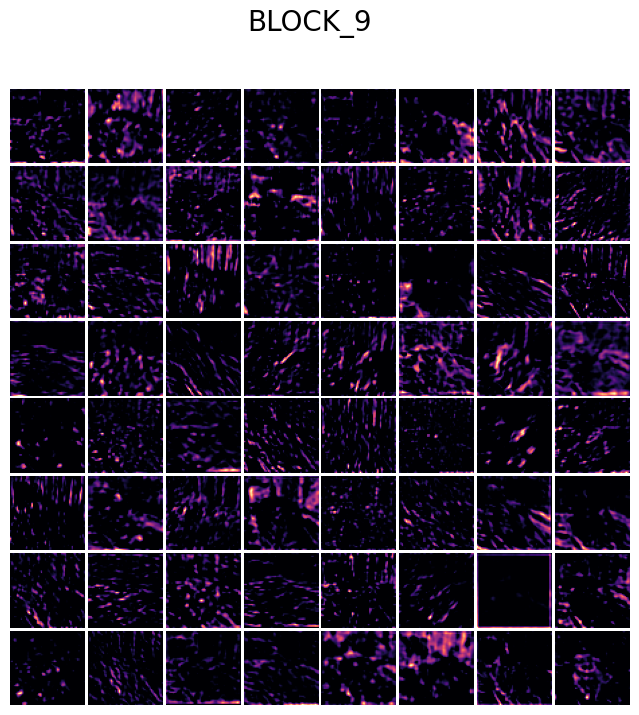

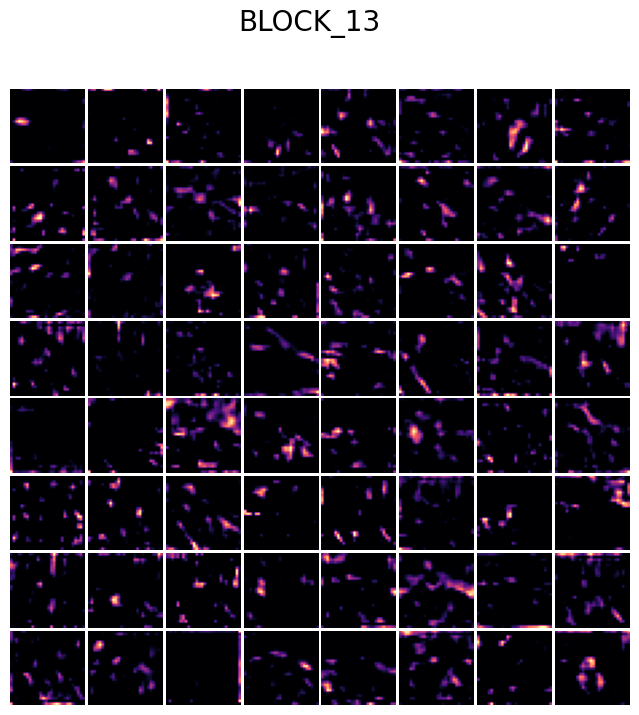

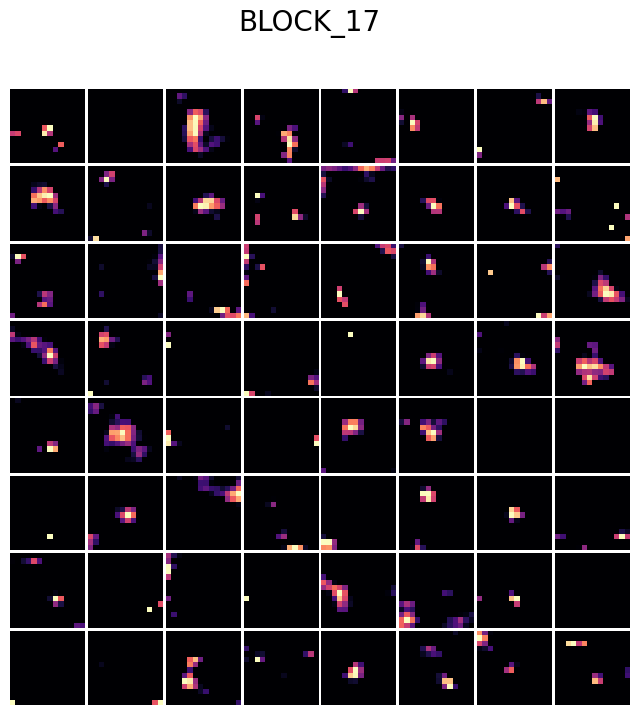

In [17]:
features = modelAllOut.predict(image)

gs1 = gridspec.GridSpec(8, 8)
gs1.update(wspace=0.04, hspace=0.04)
for j, fmap in zip(blocks, features):
    fig = plt.figure(figsize=(8,8))
    fig.suptitle("BLOCK_{}".format(j) , fontsize=20)
    for i in range(0, 64):
        # get the filters

        ax = plt.subplot(gs1[i-1])
        plt.axis(False)
        ax.set_aspect("equal")
        ax.imshow(fmap[0, :, :, i-1], cmap="magma")
#plot the filters 
fig.subplots_adjust(wspace=0, hspace=0)
plt.show()